In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [7]:
class OptdigitsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Load the data
data = pd.read_csv('./mnist_red/optdigits.tra', header=None)  # Update path as needed
X = data.iloc[:, :-1].values  # All rows, all columns except the last
y = data.iloc[:, -1].values   # All rows, last column only

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create dataset objects
train_dataset = OptdigitsDataset(X_train, y_train)
test_dataset = OptdigitsDataset(X_test, y_test)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(64, 128)  # 8x8 input image, flattened to 64 pixels
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)   # 10 output classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  # Flatten the images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

In [39]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [40]:
losts = []
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 45 == 44:    # print every 100 mini-batches
            losts.append(running_loss)
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

Epoch 1, Batch 45, Loss: 1.0354
Epoch 2, Batch 45, Loss: 1.0336
Epoch 3, Batch 45, Loss: 1.0311
Epoch 4, Batch 45, Loss: 1.0269
Epoch 5, Batch 45, Loss: 1.0169
Epoch 6, Batch 45, Loss: 0.9946
Epoch 7, Batch 45, Loss: 0.9657
Epoch 8, Batch 45, Loss: 0.9294
Epoch 9, Batch 45, Loss: 0.8953
Epoch 10, Batch 45, Loss: 0.8732
Epoch 11, Batch 45, Loss: 0.8613
Epoch 12, Batch 45, Loss: 0.8488
Epoch 13, Batch 45, Loss: 0.8276
Epoch 14, Batch 45, Loss: 0.8022
Epoch 15, Batch 45, Loss: 0.7802
Epoch 16, Batch 45, Loss: 0.7626
Epoch 17, Batch 45, Loss: 0.7432
Epoch 18, Batch 45, Loss: 0.7245
Epoch 19, Batch 45, Loss: 0.7094
Epoch 20, Batch 45, Loss: 0.6985
Epoch 21, Batch 45, Loss: 0.6917
Epoch 22, Batch 45, Loss: 0.6869
Epoch 23, Batch 45, Loss: 0.6836
Epoch 24, Batch 45, Loss: 0.6812
Epoch 25, Batch 45, Loss: 0.6794
Epoch 26, Batch 45, Loss: 0.6779
Epoch 27, Batch 45, Loss: 0.6765
Epoch 28, Batch 45, Loss: 0.6754
Epoch 29, Batch 45, Loss: 0.6746
Epoch 30, Batch 45, Loss: 0.6736
Epoch 31, Batch 45,

In [33]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

Accuracy of the network on the test images: 97.80%


In [28]:
import matplotlib.pyplot as plt

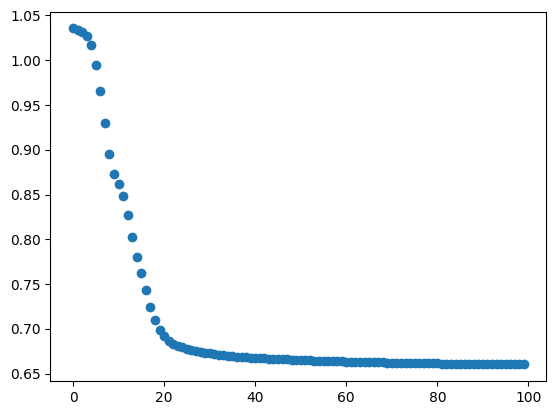

In [47]:
plt.plot(np.array(losts)/ 100, ls="none", marker="o")